# Moscow Price Prediction using Random Forest Regressor

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv(r"C:\Users\my pc\Desktop\Moscow_House_Prediction_Docker\moscow_house.csv")
df

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,New building,Котельники,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


In [3]:
df.columns = df.columns.str.replace(' ', '_')

In [4]:
df.tail()

,Price,Apartment_type,Metro_station,Minutes_to_metro,Region,Number_of_rooms,Area,Living_area,Kitchen_area,Floor,Number_of_floors,Renovation
22671,4768792.0,New building,Котельники,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic
22675,6839157.0,New building,Котельники,8.0,Moscow region,2.0,56.13,32.0,5.0,10.0,17,Cosmetic


In [5]:
df.isnull().sum()

Price               0
Apartment_type      0
Metro_station       0
Minutes_to_metro    0
Region              0
Number_of_rooms     0
Area                0
Living_area         0
Kitchen_area        0
Floor               0
Number_of_floors    0
Renovation          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment_type    22676 non-null  object 
 2   Metro_station     22676 non-null  object 
 3   Minutes_to_metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number_of_rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living_area       22676 non-null  float64
 8   Kitchen_area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number_of_floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


<Axes: xlabel='Apartment_type', ylabel='count'>

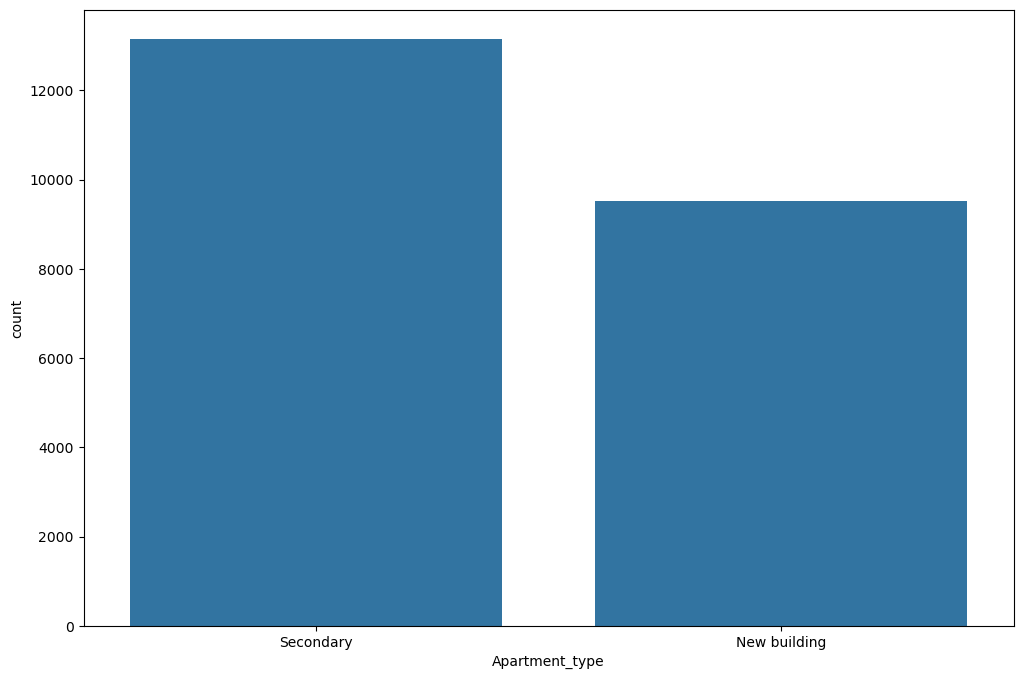

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Apartment_type')

In [8]:
df.duplicated().sum()

1835

In [9]:
df=df.drop_duplicates()

In [10]:
df

,Price,Apartment_type,Metro_station,Minutes_to_metro,Region,Number_of_rooms,Area,Living_area,Kitchen_area,Floor,Number_of_floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22670,5884024.0,New building,Котельники,8.0,Moscow region,1.0,44.17,24.5,10.3,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


<Axes: xlabel='Region'>

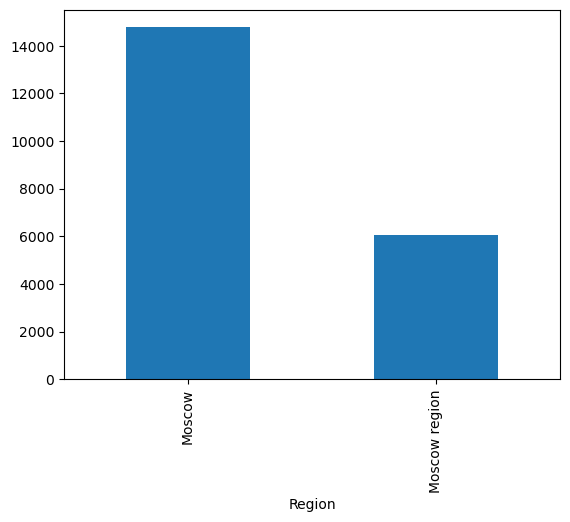

In [11]:
df['Region'].value_counts().plot(kind='bar')

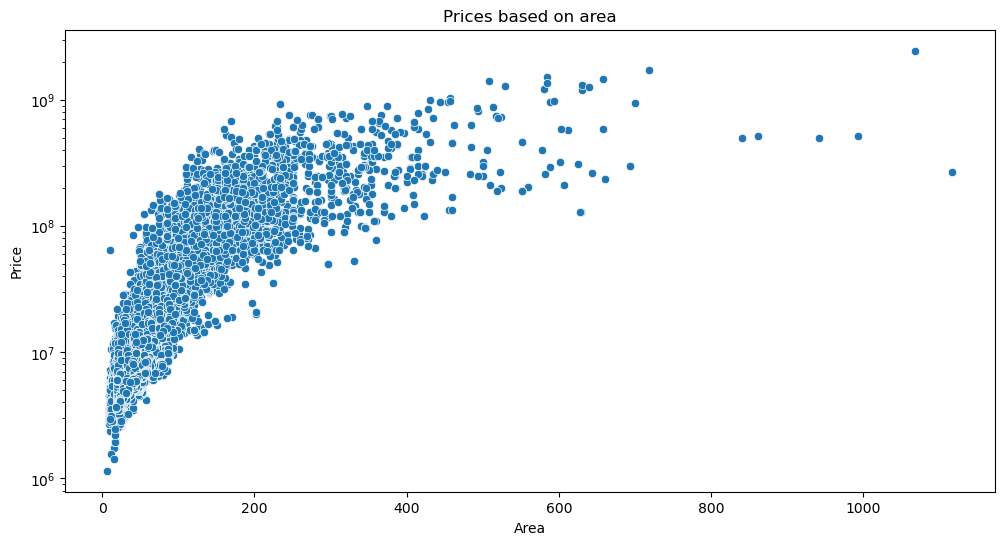

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Area',y='Price',data=df)
plt.title('Prices based on area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.yscale('log')
plt.show()

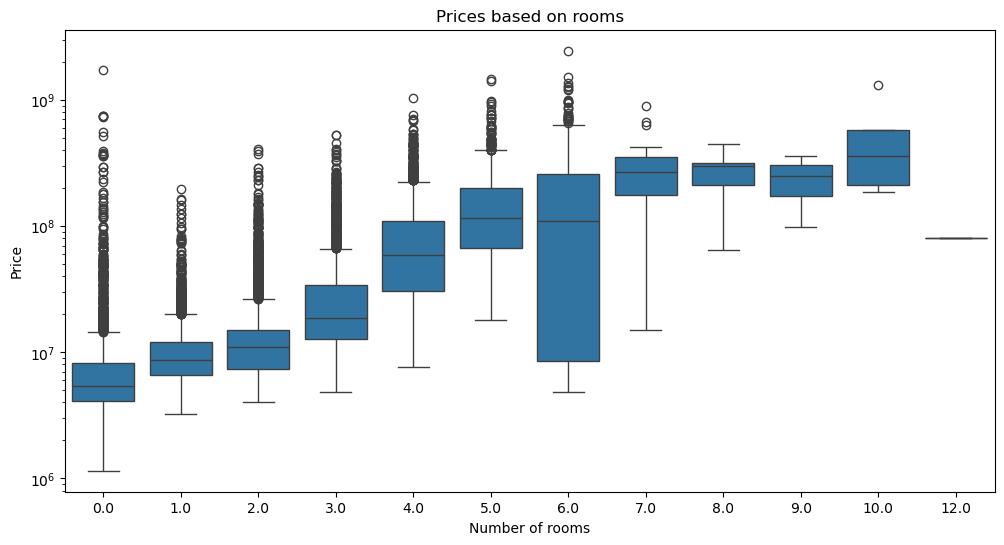

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Number_of_rooms',y='Price',data=df)
plt.title('Prices based on rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Price')
plt.yscale('log')
plt.show()

# Model Building

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [15]:
encoder=OneHotEncoder(sparse=False)
X_cat_encoded = encoder.fit_transform(df[['Apartment_type', 'Renovation']])

C:\Users\my pc\anaconda3\envs\tf2.7\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df[['Minutes_to_metro', 'Number_of_rooms', 'Area', 'Living_area', 'Kitchen_area', 'Floor', 'Number_of_floors']])

# Combine encoded and scaled features
X_combined = np.hstack([X_num_scaled, X_cat_encoded])

# Split into training and test sets
y=df['Price']
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model=RandomForestRegressor()

In [19]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [20]:
y_pred=model.predict(X_test)
y_pred

array([1.08905753e+07, 2.19369212e+08, 1.20558332e+07, ...,
       6.88156627e+06, 5.73555386e+07, 1.77405976e+08])

In [21]:
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
mean_error=mean_squared_error(y_test,y_pred)
mean_error

1569612764981579.0

In [23]:
r2=r2_score(y_test,y_pred)
r2

0.7167887376064288

In [24]:
import pickle

In [25]:
pickle_out=open("moscow_model.pkl","wb")

In [26]:
pickle.dump(model,pickle_out)

In [27]:
pickle_out.close()

In [29]:
y_pred

array([1.08905753e+07, 2.19369212e+08, 1.20558332e+07, ...,
       6.88156627e+06, 5.73555386e+07, 1.77405976e+08])